In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [64]:
info = pd.read_csv('Social_Network_Ads.csv')
info.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [65]:
x = info.iloc[:,0:-1]
y = info.iloc[:,-1]

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=64)

In [67]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [68]:
clas = LogisticRegression(random_state=0)
clas.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [69]:
y_pred = clas.predict(x_test)

In [70]:
clas.score(x_test,y_test)

0.87

In [71]:
x_train[0]

array([-0.47308118, -0.51491396])

In [72]:
clas.predict([x_train[0]])

array([0])

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        66
           1       0.84      0.76      0.80        34

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



In [74]:
print(confusion_matrix(y_test,y_pred))

[[61  5]
 [ 8 26]]


/home/jash/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


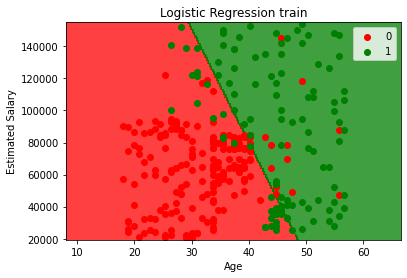

In [75]:
x_n, y_n = sc_x.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_n[:,0].min() - 10, stop = x_n[:,0].max() + 10, step = 0.25),
                  np.arange(start = x_n[:,1].min() - 1000, stop = x_n[:,1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, clas.predict(sc_x.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_n)):
    plt.scatter(x_n[y_n == j, 0], x_n[y_n == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression train')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/home/jash/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


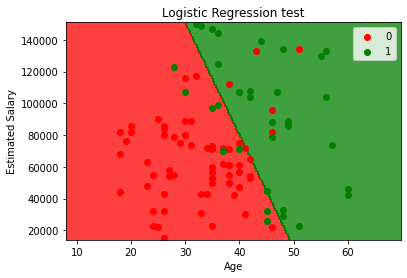

In [76]:
x_n, y_n = sc_x.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(np.arange(start = x_n[:,0].min() - 10, stop = x_n[:,0].max() + 10, step = 0.25),
                  np.arange(start = x_n[:,1].min() - 1000, stop = x_n[:,1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, clas.predict(sc_x.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_n)):
    plt.scatter(x_n[y_n == j, 0], x_n[y_n == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression test')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()